In [28]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [46]:
# importing all the necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra
import matplotlib.pyplot as plt # visualization lib
import seaborn as sns
from sklearn.model_selection import train_test_split # sklearn - ML
from sklearn.preprocessing import StandardScaler # scaling

In [86]:
location1 = pd.read_csv('/content/Location1.csv')
location2 = pd.read_csv('/content/Location2.csv')
location3 = pd.read_csv('/content/Location3.csv')
location4 = pd.read_csv('/content/Location4.csv')

In [69]:
# See the location 1
location1.head() # show you top 5 rows

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [87]:
# Add a new column to identify the location
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'

# Concatenate to a dataframe
merged_data = pd.concat([location1, location2, location3, location4], ignore_index=True)

merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85.0,24.5,1.44,1.26,146.0,162.0,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86.0,24.7,2.06,3.99,151.0,158.0,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91.0,24.5,1.30,2.78,148.0,150.0,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88.0,24.3,1.30,2.69,58.0,105.0,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88.0,24.1,2.47,4.43,58.0,84.0,4.0,0.0793,Location1


In [88]:
# Ssave the merged dataset to a new CSV file
merged_data.to_csv('/content/merged_locations.csv', index=False)

In [89]:
# To see the basic information about the dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145611 entries, 0 to 145610
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 145611 non-null  object 
 1   temperature_2m       145609 non-null  float64
 2   relativehumidity_2m  145609 non-null  float64
 3   dewpoint_2m          145609 non-null  float64
 4   windspeed_10m        145609 non-null  float64
 5   windspeed_100m       145608 non-null  float64
 6   winddirection_10m    145608 non-null  float64
 7   winddirection_100m   145608 non-null  float64
 8   windgusts_10m        145608 non-null  float64
 9   Power                145608 non-null  float64
 10  Location             145611 non-null  object 
dtypes: float64(9), object(2)
memory usage: 12.2+ MB


In [90]:
# Check the missing values
merged_data.isnull().sum()

,0
Time,0
temperature_2m,2
relativehumidity_2m,2
dewpoint_2m,2
windspeed_10m,2
windspeed_100m,3
winddirection_10m,3
winddirection_100m,3
windgusts_10m,3
Power,3


In [91]:
# Encode the categorical variables
merged_data = pd.get_dummies(merged_data, columns=['Location'], drop_first=True)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,2017-01-02 00:00:00,28.5,85.0,24.5,1.44,1.26,146.0,162.0,1.4,0.1635,False,False,False
1,2017-01-02 01:00:00,28.4,86.0,24.7,2.06,3.99,151.0,158.0,4.4,0.1424,False,False,False
2,2017-01-02 02:00:00,26.8,91.0,24.5,1.30,2.78,148.0,150.0,3.2,0.1214,False,False,False
3,2017-01-02 03:00:00,27.4,88.0,24.3,1.30,2.69,58.0,105.0,1.6,0.1003,False,False,False
4,2017-01-02 04:00:00,27.3,88.0,24.1,2.47,4.43,58.0,84.0,4.0,0.0793,False,False,False


In [92]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [93]:
# Let's remove time col
merged_data.drop('Time', axis=1, inplace=True)

In [94]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85.0,24.5,1.44,1.26,146.0,162.0,1.4,0.1635,False,False,False
1,28.4,86.0,24.7,2.06,3.99,151.0,158.0,4.4,0.1424,False,False,False
2,26.8,91.0,24.5,1.30,2.78,148.0,150.0,3.2,0.1214,False,False,False
3,27.4,88.0,24.3,1.30,2.69,58.0,105.0,1.6,0.1003,False,False,False
4,27.3,88.0,24.1,2.47,4.43,58.0,84.0,4.0,0.0793,False,False,False


In [95]:
numerical_columns = merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')

In [96]:
merged_data.shape

(145611, 12)

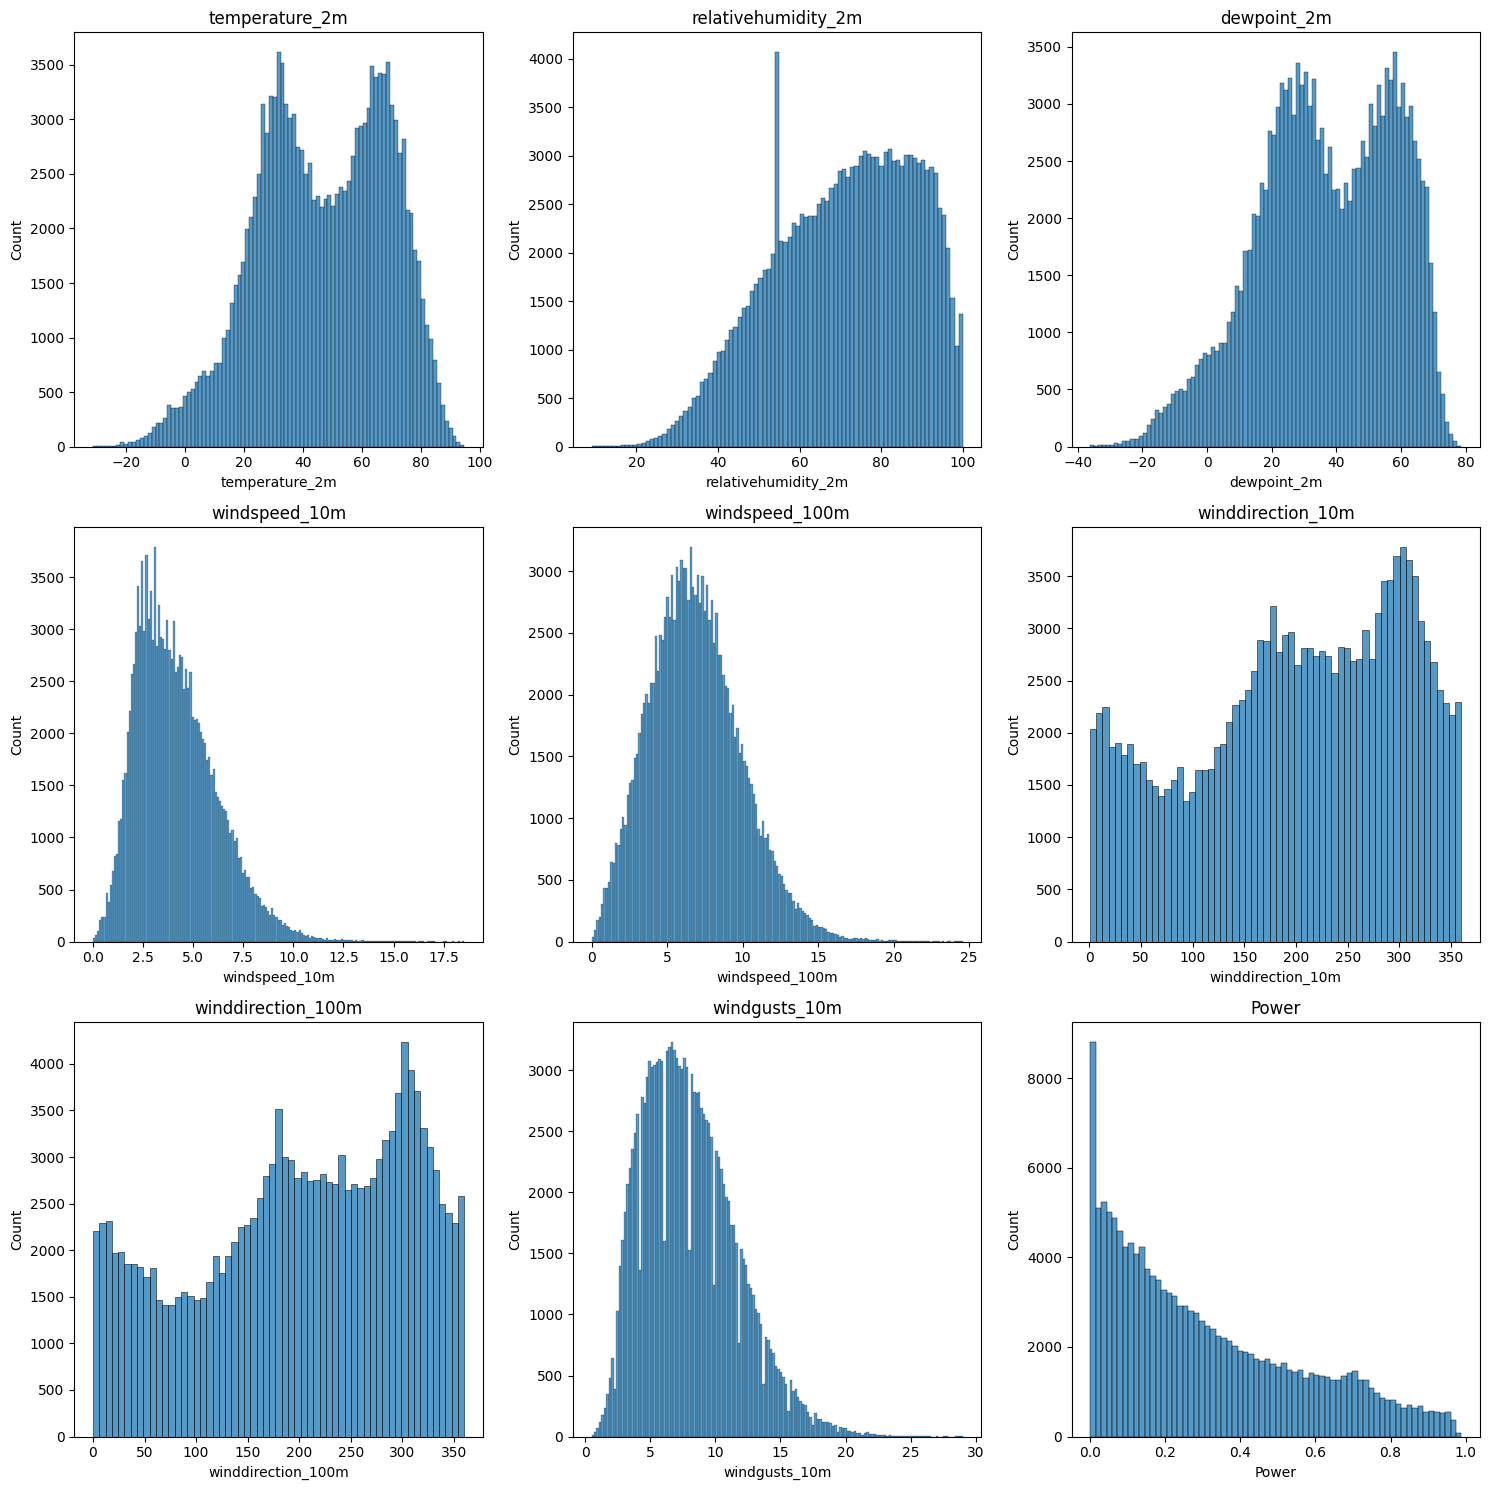

In [105]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten() # we have 2d array and for that we need indices, rows/cols, so converting into 1d array
for i, col in enumerate(numerical_columns):
    sns.histplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

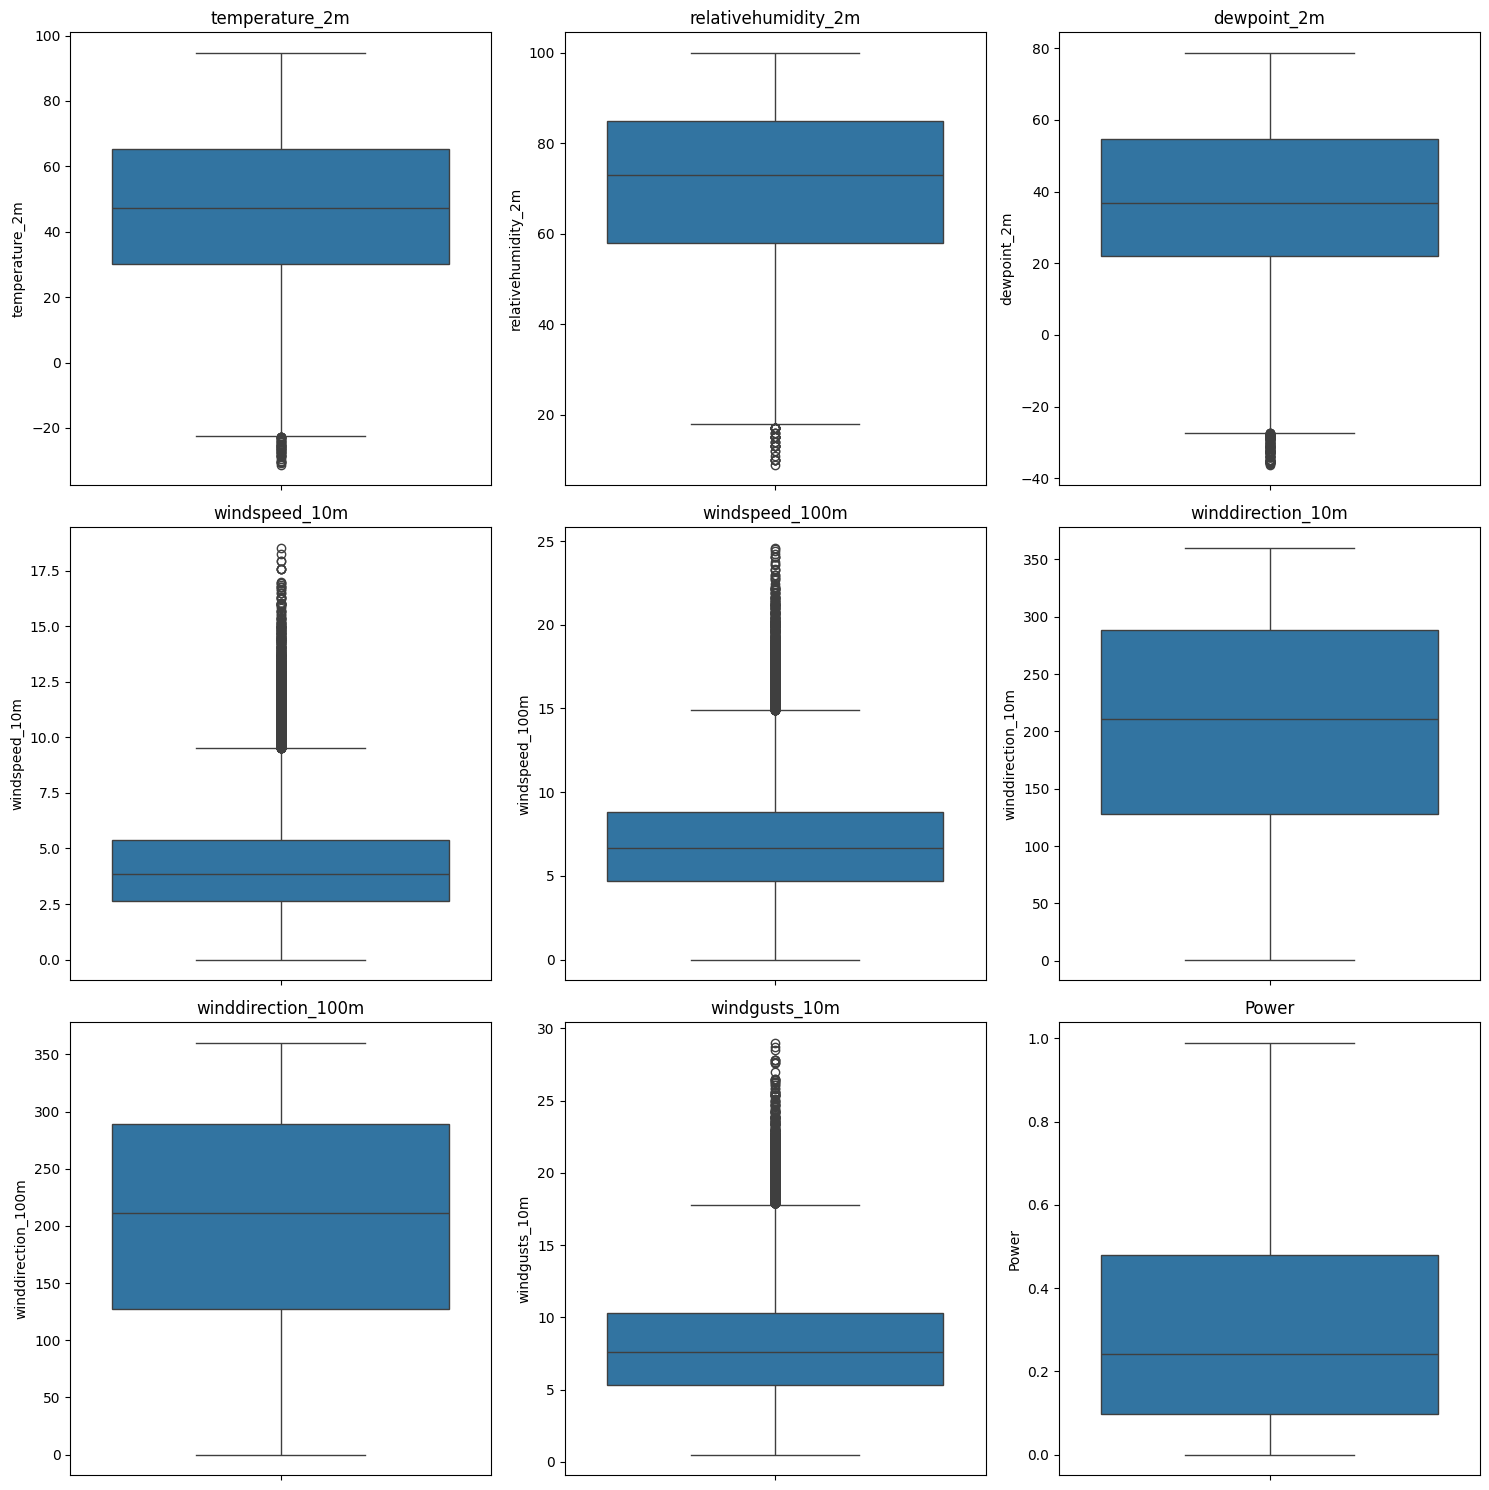

In [104]:
fig, axes = plt.subplots( 3,3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

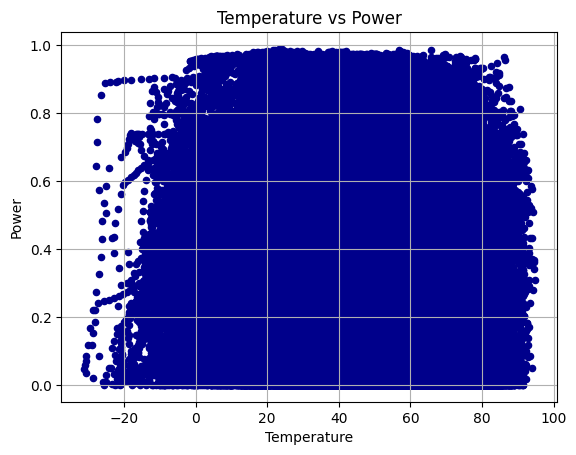

In [106]:
merged_data.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

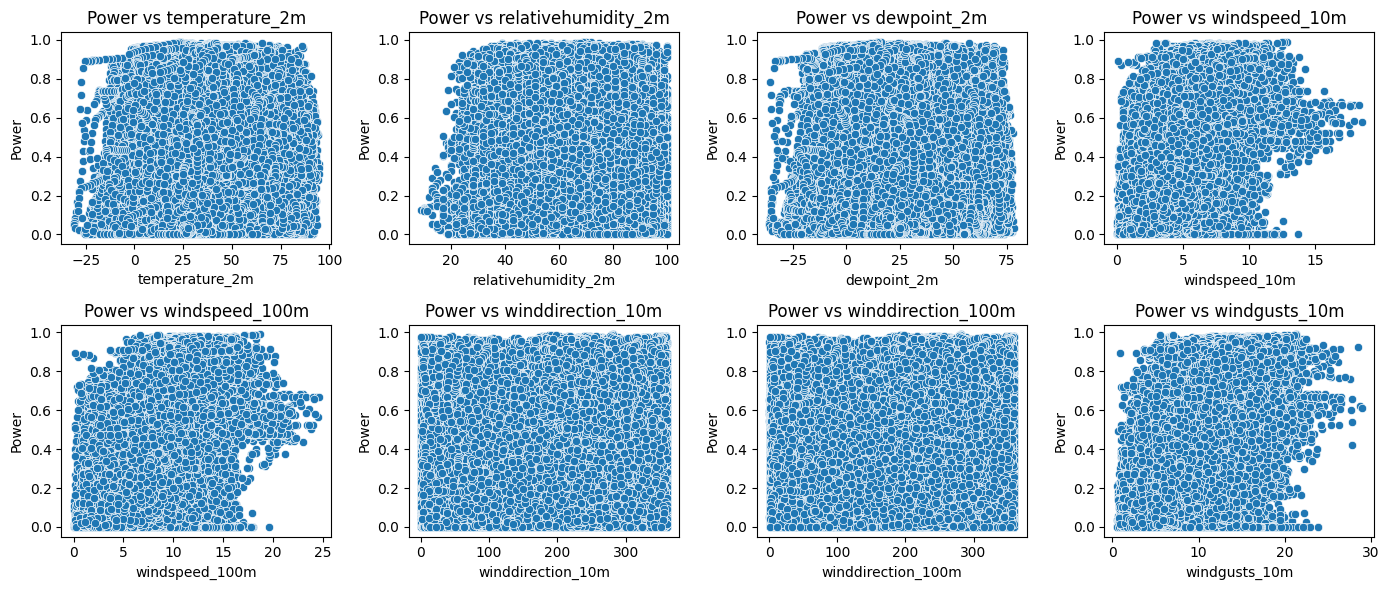

In [107]:
fig, axes = plt.subplots(2, 4, figsize=(14, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=merged_data, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()

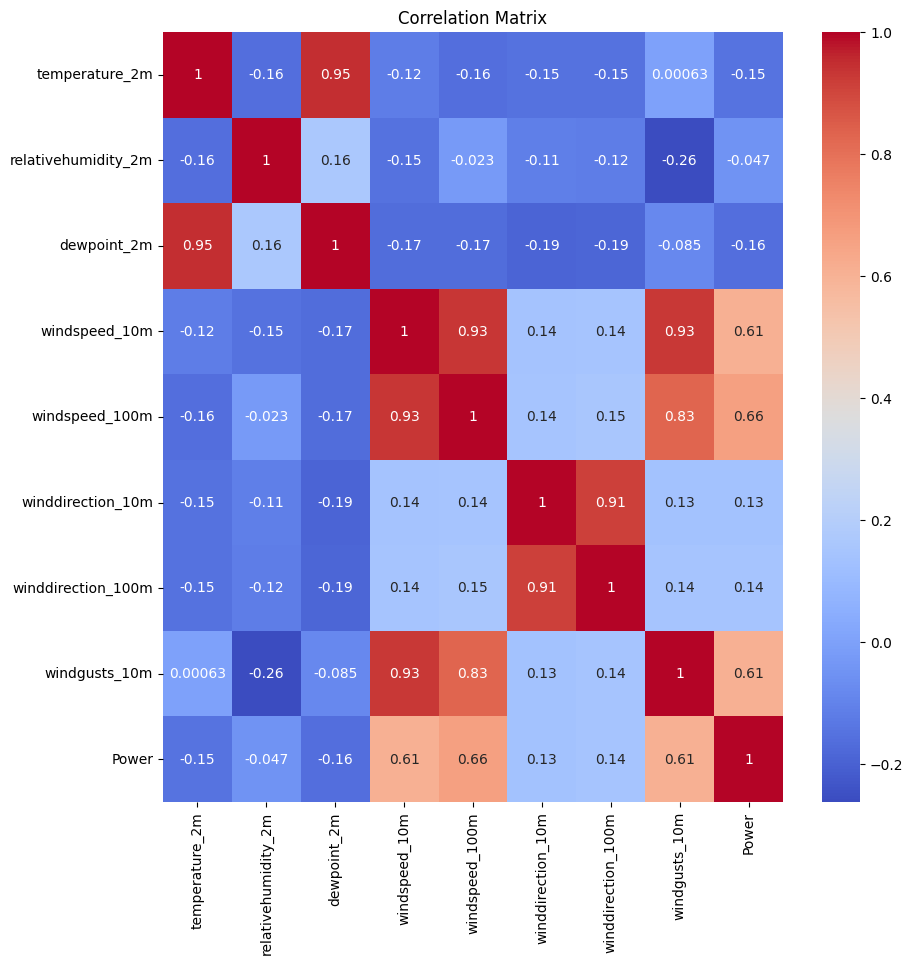

In [108]:
correlation = merged_data[numerical_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()